In [7]:
import re
import numpy as np

In [8]:
import nltk
from nltk.corpus import stopwords

## Load toxicity model

In [9]:
from detoxify import Detoxify
model = Detoxify('multilingual')
results = model.predict(['jajajajajaja que hijo de puta'])
results

/home/juan/projects/WhatsappAnalyzer/mundialdelectura/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


{'toxicity': [0.9959450364112854],
 'severe_toxicity': [0.019979890435934067],
 'obscene': [0.1270298957824707],
 'identity_attack': [0.022107912227511406],
 'insult': [0.10652612149715424],
 'threat': [0.004996316507458687],
 'sexual_explicit': [0.16550682485103607]}

In [10]:
def get_toxicity(message):
  return model.predict(message)["toxicity"]

## READ FROM TXT FILE

In [11]:
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from pathlib import Path

plt.rcParams["figure.figsize"] = (20, 20)


In [ ]:
akas_for_each_person = {
    
}

In [ ]:
path = Path("./Chat_as_DF.pkl")
if path.is_file():
    after_process = pd.read_pickle(path)

In [ ]:
keys = ["Person1",
        "Person2",
        "Person3",
        "Person4",
        "Person5",
        "Person6",
        "Person7",
        "Person8",
        "Person9",
        "Person10",
        "Person11",
        "Person12",
        "Person13",]#akas_for_each_person.keys()

In [ ]:
after_process['User'] = 'Person' + pd.Series(pd.factorize(after_process['User'])[0] + 1).astype(str)

In [ ]:
after_process = after_process[after_process["User"].isin(keys)]
total_messages = len(after_process)

In [ ]:
after_process[:10]

In [ ]:
total_messages

In [12]:
from tqdm.notebook import tqdm_notebook

In [13]:
pd.__version__

'2.2.2'

In [5]:
import re
splitted_chat = []
with open("./Chat de WhatsApp con Mundial de Lectura/chats.tail.txt", "r") as chat:
    all_chat = chat.read().replace("\n", " ")
    splitted_chat = re.findall("\d{1,2}\/\d{1,2}\/\d{4}, \d{1,2}:\d{2} - \+[()\d\w\s-]+: [\s\S]*?(?=\d{1,2}\/\d{1,2}\/\d{4}, \d{1,2}:\d{2} - \+|$)", all_chat)

In [22]:
def process_line(line):
    #10/3/2024, 12:44 - +54 9 11 3763-1285: Muchas Gracias !!! Ya compre entradas.
    regex_result = re.search("^(\d{1,2}\/\d{1,2}\/\d{4}), (\d\d:\d\d) - \+([()\d\w\s-]*): ([\s\S]*)$", line)
    Message_Raw = line
    date = regex_result.group(1)
    time = regex_result.group(2)
    name_in_line = regex_result.group(3)
    message = regex_result.group(4)
    toxicity = get_toxicity(message)
    date = datetime.strptime(f"{date} {time}", "%d/%m/%Y %H:%M")
    return pd.DataFrame([{
            "User": name_in_line,
            "Message_Raw": Message_Raw,
            "Message_Clean": message,
            "Message_Only_Text": message.lower() ,
            "Toxicity": toxicity,
            "Date": date,
            "Hour": date.hour,
            "Day_of_Week": date.weekday()
           }])

In [23]:
after_process = pd.DataFrame()
with tqdm_notebook(total=len(splitted_chat)) as progress_bar:
    for line in splitted_chat:
        try:
            processed_line = process_line(line)
            after_process = pd.concat([after_process, processed_line])
        except Exception as err:
            print(f"EXCEPTION {err} on line {line}")
            pass
        finally:
            progress_bar.update(1)
            


  0%|          | 0/83 [00:00<?, ?it/s]

In [24]:
after_process.to_pickle("Chat_as_DF.pkl")

In [25]:
after_process

,User,Message_Raw,Message_Clean,Message_Only_Text,Toxicity,Date,Hour,Day_of_Week
0,54 9 291 432-4646,"8/5/2024, 21:11 - +54 9 291 432-4646: Hasta dó...",Hasta dónde leemos para el viernes?,hasta dónde leemos para el viernes?,0.000402,2024-05-08 21:11:00,21,2
0,54 9 11 4916-4740,"8/5/2024, 21:13 - +54 9 11 4916-4740: Acá el c...",Acá el cronograma de lectura,acá el cronograma de lectura,0.001018,2024-05-08 21:13:00,21,2
0,54 9 291 432-4646,"8/5/2024, 21:20 - +54 9 291 432-4646: No puedo...",No puedo abrir el cronograma,no puedo abrir el cronograma,0.000642,2024-05-08 21:20:00,21,2
0,54 9 343 610-1042,"8/5/2024, 21:21 - +54 9 343 610-1042: Por que ...",Por que no esta más fijado?,por que no esta más fijado?,0.005338,2024-05-08 21:21:00,21,2
0,54 9 291 432-4646,"8/5/2024, 21:21 - +54 9 291 432-4646: Lo q pas...",Lo q pasa es q voy borrando mjes xq son ciento...,lo q pasa es q voy borrando mjes xq son ciento...,0.461167,2024-05-08 21:21:00,21,2
...,...,...,...,...,...,...,...,...
0,54 9 2314 41-1016,"10/5/2024, 16:28 - +54 9 2314 41-1016: Me enca...",Me encantò!!! Gracias sss 💚,me encantò!!! gracias sss 💚,0.001636,2024-05-10 16:28:00,16,4
0,54 9 2314 41-1016,"10/5/2024, 16:30 - +54 9 2314 41-1016: Es mara...",Es maravilloso este grupo! Y qué placer la lec...,es maravilloso este grupo! y qué placer la lec...,0.000527,2024-05-10 16:30:00,16,4
0,54 9 11 4084-4598,"10/5/2024, 16:57 - +54 9 11 4084-4598: https:/...",https://youtu.be/DbXLrkMFm8Q?si=HvWiLFqKP8fb_4Yx,https://youtu.be/dbxlrkmfm8q?si=hvwilfqkp8fb_4yx,0.000500,2024-05-10 16:57:00,16,4
0,54 9 11 4084-4598,"10/5/2024, 16:58 - +54 9 11 4084-4598: No sé s...","No sé si alguien lo compartió ya, pero es un v...","no sé si alguien lo compartió ya, pero es un v...",0.000463,2024-05-10 16:58:00,16,4


In [ ]:
after_process = pd.DataFrame()
with open("./Alloy_Del_Negro-Clean.txt", "r") as chat:
    s = chat.read(1024)

print(s)
a = re.split(r'(\[\d{1,2}\/\d{1,2}\/\d{2} \d\d:\d\d:\d\d\]) ', s)[1:]
pair = zip(a[0::2],a[1::2])
print(list(pair))


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(after_process["Message_Only_Text"], after_process["User"], test_size=0.2, random_state=42)

## Messages sent by person

<Axes: xlabel='User'>

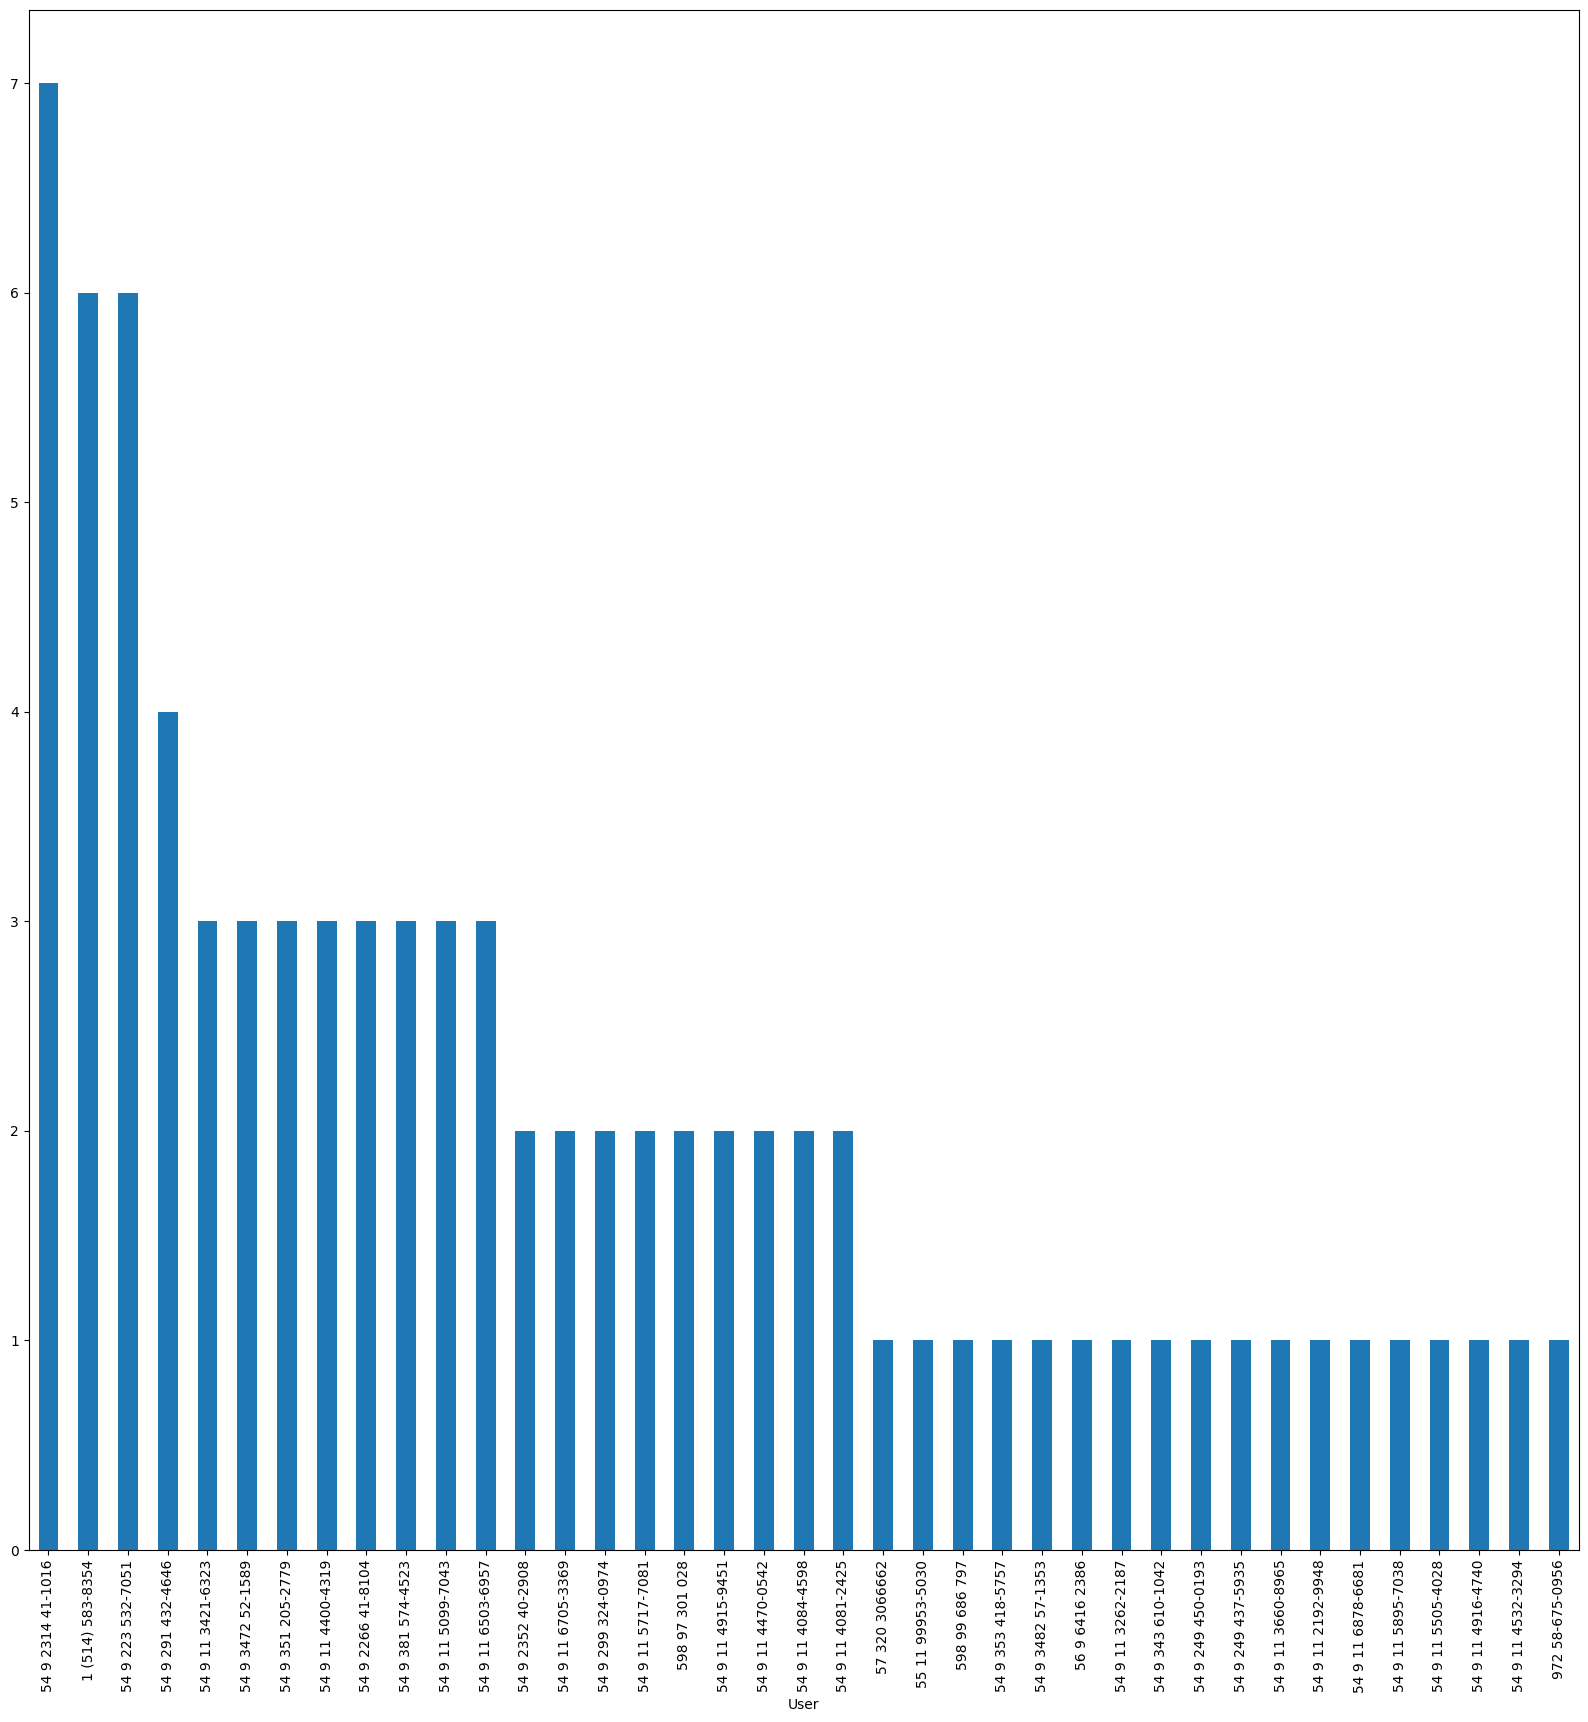

In [26]:
messages_by_person = after_process.groupby("User")
messages_by_person["User"].count().sort_values(ascending=False).plot(kind="bar")

## Messages per week

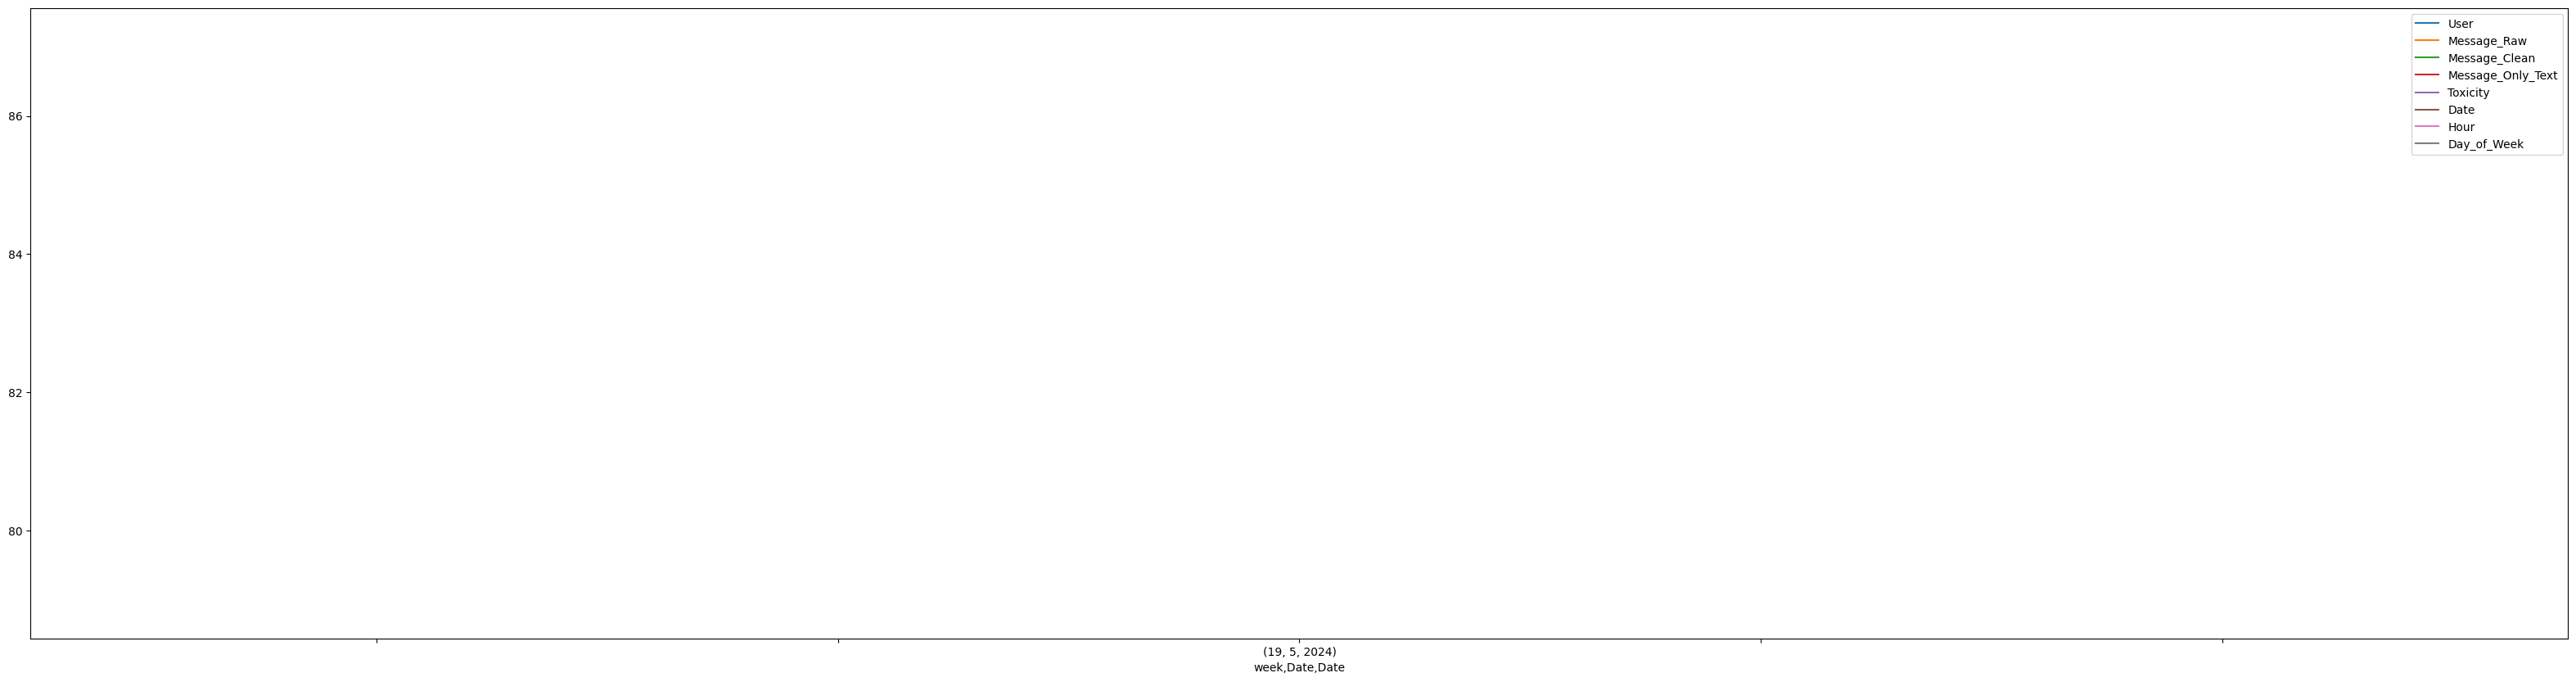

In [28]:
by_date_by_person = after_process.groupby([after_process["Date"].dt.isocalendar().week, after_process["Date"].dt.month, after_process["Date"].dt.year]).count().plot(kind="line", figsize=(40,10))


## Day with max number of messages for each person

In [ ]:
max_messages_on_a_day_per_person = after_process.groupby(["User", after_process["Date"].dt.date]).count().sort_values(by="Hour").groupby(level=0).tail(1).sort_values(ascending=False, by="Hour")

max_messages_on_a_day_per_person["Date"].reset_index(name="Total messages")

## Day of the week with most messages for each person

In [ ]:
import calendar

messages_by_day_of_week = after_process.groupby(["User", after_process["Date"].dt.weekday]).count().sort_values(by="Hour")["Date"]

matrix_of_messages = messages_by_day_of_week.unstack()
matrix_of_messages.columns = map(lambda x: calendar.day_name[x],matrix_of_messages.columns)
matrix_of_messages.style.background_gradient(cmap="RdYlGn")

## Top 10 days with higher number of messages

In [29]:
higher_number_of_messages = after_process.groupby(after_process["Date"].dt.date).count()

for day in higher_number_of_messages.nlargest(columns="Hour", n=10).iterrows():
    print(f'Day (YYYY-MM-dd): {day[0]} - Number of messages: {day[1]["Hour"]}')

Day (YYYY-MM-dd): 2024-05-10 - Number of messages: 62
Day (YYYY-MM-dd): 2024-05-08 - Number of messages: 14
Day (YYYY-MM-dd): 2024-05-09 - Number of messages: 7


## Hour with the higher number of messages overall

In [30]:
higher_number_of_messages_of_hour = after_process.groupby(after_process["Date"].dt.hour).count()


print(f'Hour: {higher_number_of_messages_of_hour.idxmax()["Date"]} - Number of messages: {higher_number_of_messages.max()["Date"]}')

Hour: 11 - Number of messages: 62


## Most messages in an hour

In [31]:
higher_number_of_messages = after_process.groupby([after_process["Date"].dt.date, after_process["Date"].dt.hour]).count()

print(f'Day (YYYY-MM-dd): {higher_number_of_messages.idxmax()["Date"][0]} - Hour: {higher_number_of_messages.idxmax()["Date"][1]} - Number of messages: {higher_number_of_messages.max()["Date"]}')

Day (YYYY-MM-dd): 2024-05-10 - Hour: 11 - Number of messages: 12


## Messages per hour

In [ ]:
messages_per_hour = after_process.groupby("Hour")["Hour"].count().plot(kind="bar")

## Messages per day of the week

In [ ]:
messages_per_hour = after_process.groupby(after_process["Date"].dt.isocalendar().day)["Hour"].count().plot(kind="bar", color="green")

## Messages per week of the each year

In [ ]:
after_process.groupby([after_process["Date"].dt.month, after_process["Date"].dt.year])["Hour"].count().unstack(level=1).plot(kind="bar", color="dodgerblue", subplots=True)

## Total messages per year

In [ ]:
messages_per_year = after_process.groupby(after_process["Date"].dt.year).count()
print(f'Total: {messages_per_year["Hour"].to_string()} \n---------\nAverage: {(messages_per_year["Hour"] / 365).to_string()}')

## Average length per person

In [ ]:
messages_by_person["Message_Clean"].apply(lambda x: np.mean(x.str.len())).reset_index(name='Average length of message').style.background_gradient(cmap="RdYlGn")

## Amount of characters written by each person

In [ ]:
messages_by_person["Message_Clean"].apply(lambda x: np.sum(x.str.len())).reset_index(name='Number of total characters').style.background_gradient(cmap="RdYlGn")

In [ ]:
message_counter =  Counter(after_process["User"])

In [ ]:
message_counter

## Matrix of responses per pair of persons

In [ ]:
tuples_of_lines = zip(after_process[2:].iterrows(), after_process[3:].iterrows())
print(tuples_of_lines)
initial_dict = dict.fromkeys(keys, 0)

matrix_of_responses = {key: initial_dict.copy() for key in keys }

for line in tuples_of_lines:
  person_asking = line[0][1]["User"]
  person_responding = line[1][1]["User"]
  matrix_of_responses[person_asking][person_responding] += 1

In [ ]:
#normalize count
for key in matrix_of_responses:
    for inner_key in matrix_of_responses[key]:
      #matrix_of_responses[key][inner_key] *= (len(messages_by_person.get_group(key)) * len(messages_by_person.get_group(inner_key))) / (total_messages * total_messages)
      pass


In [ ]:
len(messages_by_person.get_group("Person1"))

In [ ]:
matrix = []

for value in matrix_of_responses.values():
  matrix.append(list(value.values()))

matrix = np.array(matrix)
with_diagonal = np.fill_diagonal(matrix, 0)

In [ ]:
fig, ax = plt.subplots()

def set_ticks(ax, labels, which):
  if which == "x":
    ax.set_xticklabels(labels)
    ax.set_xticks(np.arange(len(labels)))
  else:
    ax.set_yticklabels(labels)
    ax.set_yticks(np.arange(len(labels)))

set_ticks(ax, list(matrix_of_responses.keys()), "x")
set_ticks(ax, list(matrix_of_responses.keys()), "y")

plt.xticks(rotation=45)

for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        text = ax.text(j, i, round(matrix[i, j], 2),
                       ha="center", va="center", color="r", fontweight="bold")

ax.imshow(matrix, cmap="BuGn")
plt.show()

#show responses/total messages

## Who laugh the most?

In [ ]:
def is_laugh(message):
  reg = re.compile(r"^.*\b[JjeEiIAakKSs]{3,}\b.*$")
  is_jj = re.compile(r"^.*\b[jJ][jJ]\b.*$")
  return bool(reg.match(message)) and bool(not is_jj.match(message))

In [ ]:
count_laughs = dict.fromkeys(keys, 0)

for person, messages in messages_by_person:
  print(person)
  for message in messages.iterrows():
    if is_laugh(message[1]["Message_Clean"]):
      count_laughs[person] += 1

plt.bar(list(keys), list(count_laughs.values()))
plt.title("Who laugh the most overall?")
plt.xticks(rotation=90)
plt.show()

print(count_laughs)


In [ ]:
average_laughs = dict.fromkeys(akas_for_each_person.keys(), 0)
for person in count_laughs:
  average_laughs[person] = count_laughs[person] / len(messages_by_person.get_group(person))

plt.bar(list(keys), list(count_laughs.values()))
plt.title("Who laugh the most (probability per message)?")
plt.xticks(rotation=90)
plt.show()

## Mentions matrix

In [ ]:
from itertools import chain
count_of_mentions_per_person = empty_dict_of_names.copy()

for person in messages_grouped_by_person:
  individual_count = empty_dict_of_names.copy()
  count_of_mentions_per_person[person] = dict(Counter(list(chain.from_iterable([list(message["Mentions"]) for message in messages_grouped_by_person[person]]))))


count_of_mentions_per_person

In [ ]:
matrix_of_mentions = []

for mentions in count_of_mentions_per_person.values():
  matrix_of_mentions.append(list(np.array(list(mentions.values())).astype(float)))

#matrix_of_mentions = np.array(matrix_of_mentions)
#np.fill_diagonal(matrix_of_mentions, 0)

matrix_of_mentions

In [ ]:
figure, axis = plt.subplots()

#set_ticks(axis, list(count_of_mentions_per_person.keys()), "x")
#set_ticks(axis, list(count_of_mentions_per_person.keys()), "y")

#plt.xticks(rotation=90)

#axis.imshow(matrix_of_mentions, cmap=plt.cm.binary)
#plt.show()

## Average toxicity by person

In [ ]:
toxic_messages = after_process.groupby("User").mean()
toxic_messages["Toxicity"].plot(kind="bar")

### Top 10 most toxic messages

In [ ]:
after_process.nlargest(10, "Toxicity")[["Message_Clean", "Toxicity"]].reset_index()

In [ ]:
from nltk.corpus import stopwords
import nltk
spanish_stopwords = stopwords.words("spanish")
spanish_stopwords.extend(["q", "dsp", "si", "<", ">", "multimedia", "omitido", "omitida", "\u200eaudio", "\u200eimagen", "\u200esticker", "\u200evideo", "\u200egif", "", "Hola", "t", "d", ""])

In [ ]:
nltk.download("punkt")

In [ ]:
import spacy
import spacy_spanish_lemmatizer
nlp = spacy.load("es_core_news_sm")

In [ ]:
import string

In [ ]:
def lemmatize(message):
    return [token.lemma_ for token in nlp(message)]

def remove_word(word):
    return word in spanish_stopwords or is_laugh(word) or len(word) <= 3

def process_message(message):
    return [ token for token in nltk.word_tokenize(message.translate(str.maketrans('', '', string.punctuation))) if not remove_word(token.lower()) ]

In [ ]:
process_message("Hola, como estas vos?")

In [ ]:
messages_without_stopwords = []
for index, message in after_process.iterrows():
    new_message = message.copy()
    new_message["Message_Only_Text"] = " ".join(process_message(message["Message_Only_Text"]))
    messages_without_stopwords.append(new_message)

## Most frequently used words per person

In [ ]:
messages_per_person_without_stopwords = dict.fromkeys(keys, [])
for person, messages in messages_by_person:
    for message in messages.iterrows():
        new_message = process_message(message[1]["Message_Only_Text"])
        messages_per_person_without_stopwords[person].extend(new_message)

In [ ]:
most_used_words = dict.fromkeys(akas_for_each_person.keys(), 0)
for person in messages_per_person_without_stopwords:
    print(person)
    most_used_words[person] = Counter(messages_per_person_without_stopwords[person])

In [ ]:
Counter(messages_per_person_without_stopwords["Person2"]).most_common(10)